<a href="https://colab.research.google.com/github/jhlee508/sparta-pytorch/blob/master/week1/week1_sparta_pytorch_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

### 기상청 데이터
- 기상청 자료 개방 포털 (https://data.kma.go.kr/cmmn/main.do)

In [3]:
df = pd.read_csv('Sparta_CodingClub_Linear_Regression.csv', encoding='euc-kr')

In [6]:
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [7]:
print(len(df))

8782


In [8]:
# 결측값이 있는지 반드시 확인.
print(df.isnull().sum())

지점          0
지점명         0
일시          0
기온(°C)      3
지면온도(°C)    0
dtype: int64


In [9]:
df = df.dropna() # 결측값 제거
print(df.isnull().sum())

지점          0
지점명         0
일시          0
기온(°C)      0
지면온도(°C)    0
dtype: int64


In [10]:
print(len(df))

8779


In [11]:
# 마지막 열만 추출
df.iloc[:, -1:]

,지면온도(°C)
0,-2.9
1,-2.4
2,-2.2
3,-2.0
4,-1.9
...,...
8777,-0.6
8778,-0.7
8779,-1.2
8780,-1.5


In [12]:
# 지면 온도를 y 데이터로 저장
y_data = df.iloc[:, -1:].values

In [13]:
y_data

array([[-2.9],
       [-2.4],
       [-2.2],
       ...,
       [-1.2],
       [-1.5],
       [-1.2]])

In [14]:
# 뒤에서 두번째 열 추출
df.iloc[:, -2:-1]

,기온(°C)
0,-8.7
1,-7.3
2,-6.7
3,-6.2
4,-5.9
...,...
8777,-6.6
8778,-6.4
8779,-7.3
8780,-9.0


In [15]:
# 기온을 X 데이터에 저장
X_data = df.iloc[:, -2:-1].values

In [16]:
X_data

array([[-8.7],
       [-7.3],
       [-6.7],
       ...,
       [-7.3],
       [-9. ],
       [-9.2]])

In [17]:
# Pytorch의 텐서 타입으로 변환
X_data = torch.FloatTensor(X_data)
y_data = torch.FloatTensor(y_data)

In [18]:
torch.manual_seed(1)

In [19]:
model = nn.Linear(1, 1)

In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [21]:
X_data

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])

In [22]:
y_data

tensor([[-2.9000],
        [-2.4000],
        [-2.2000],
        ...,
        [-1.2000],
        [-1.5000],
        [-1.2000]])

In [23]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) 

In [24]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000

for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(X_data)

    # cost 계산
    cost = F.mse_loss(prediction, y_data) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 114.039139
Epoch  100/2000 Cost: 13.479836
Epoch  200/2000 Cost: 13.401425
Epoch  300/2000 Cost: 13.334760
Epoch  400/2000 Cost: 13.278080
Epoch  500/2000 Cost: 13.229892
Epoch  600/2000 Cost: 13.188920
Epoch  700/2000 Cost: 13.154087
Epoch  800/2000 Cost: 13.124472
Epoch  900/2000 Cost: 13.099293
Epoch 1000/2000 Cost: 13.077885
Epoch 1100/2000 Cost: 13.059685
Epoch 1200/2000 Cost: 13.044209
Epoch 1300/2000 Cost: 13.031053
Epoch 1400/2000 Cost: 13.019866
Epoch 1500/2000 Cost: 13.010357
Epoch 1600/2000 Cost: 13.002270
Epoch 1700/2000 Cost: 12.995397
Epoch 1800/2000 Cost: 12.989552
Epoch 1900/2000 Cost: 12.984582
Epoch 2000/2000 Cost: 12.980357


In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0972]], requires_grad=True), Parameter containing:
tensor([0.5773], requires_grad=True)]


In [26]:
y_pred = model(X_data).detach().numpy()
y_pred

array([[-8.968173 ],
       [-7.432125 ],
       [-6.7738185],
       ...,
       [-7.432125 ],
       [-9.297326 ],
       [-9.516761 ]], dtype=float32)

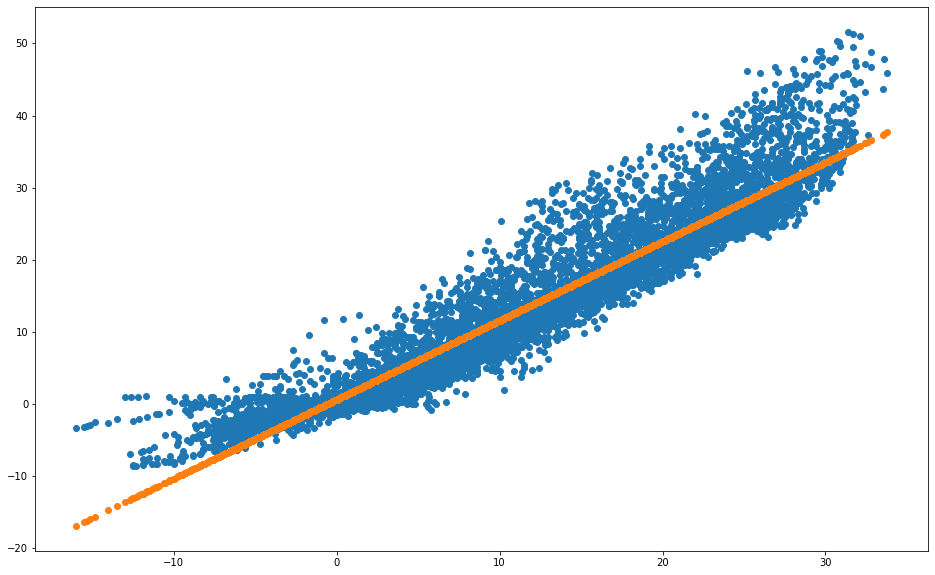

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.scatter(X_data, y_data)
plt.scatter(X_data, y_pred)
plt.show()